In [1]:
from __future__ import print_function
from __future__ import division
from __future__ import absolute_import
from __future__ import unicode_literals

import os
import sys

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
sns.set()
sns.set_style("whitegrid")
sns.set_context("poster")

mpl.rcParams['figure.figsize'] = [8.0*2, 6.0*2]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100

mpl.rcParams['font.size'] = 30
mpl.rcParams['axes.labelsize'] = 30
mpl.rcParams['ytick.labelsize'] = 30
mpl.rcParams['xtick.labelsize'] = 30
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'



# Introduction

On fait des plots sur les runs

In [2]:
from problem.workflow import pprint

# Data

In [3]:
from problem.fashion_mnist import load_data

In [4]:
X, y = load_data()

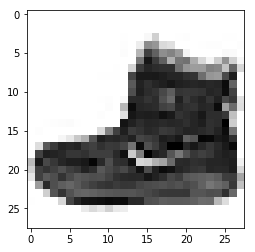

In [6]:
img = X[0]
plt.imshow(img.reshape(28,28), cmap='Greys')
plt.show()

# Load models

In [5]:
from problem.fashion_mnist import get_save_directory
from problem.fashion_mnist import preprocessing
from problem.fashion_mnist import skew
from problem.fashion_mnist import tangent
from problem.fashion_mnist import get_cv_iter


In [6]:
def load_models(model_class, *args, **kwargs):
    models = []
    cv_iter = get_cv_iter(X, y)
    n_cv = len(cv_iter)
    pprint('Loading', n_cv, model_class.__name__)
    for i in range(n_cv):
        model = model_class(*args, **kwargs)
        save_directory = get_save_directory()
        model_name = '{}-{}'.format(model.get_name(), i)
        path = os.path.join(save_directory, model_name)
        model.load(path)
        models.append(model)
    return models

In [7]:
from models.fashion_mnist import NeuralNetModel
from models.fashion_mnist import AugmentedNeuralNetModel
from models.fashion_mnist import TangentPropModel
from models.fashion_mnist import AugmentedTangentPropModel
from models.fashion_mnist import PivotModel


# Test submission

In [8]:
from problem.fashion_mnist import test_submission


In [9]:
def get_mean_std(df_list):
    z = df_list[0]['z']
    acc = np.concatenate([df['accuracy'].values.reshape(-1, 1) for df in df_list], axis=1)
    mean_acc = np.mean(acc, axis=1)
    std_acc = np.std(acc, axis=1)
    return mean_acc, std_acc

In [10]:
# z_list = list(range(-50, 51, 10)) + list(range(-5, 6, 1))
# z_list = sorted(z_list)
z_list = np.linspace(-10, 10, num=20)

print( z_list )

In [11]:
NN_models = load_models(NeuralNetModel, n_steps=10000, batch_size=128, cuda=True)
df_list = test_submission(NN_models, X, y, z_list=z_list)
NN_mean_acc, NN_std_acc = get_mean_std(df_list)


2017-11-24 16:00:07 testing model 1/12
2017-11-24 16:00:41 testing model 2/12
2017-11-24 16:01:14 testing model 3/12
2017-11-24 16:01:47 testing model 4/12
2017-11-24 16:02:21 testing model 5/12
2017-11-24 16:02:54 testing model 6/12
2017-11-24 16:03:26 testing model 7/12
2017-11-24 16:03:59 testing model 8/12
2017-11-24 16:04:31 testing model 9/12
2017-11-24 16:05:04 testing model 10/12
2017-11-24 16:05:36 testing model 11/12
2017-11-24 16:06:08 testing model 12/12
2017-11-24 16:06:40 Done.


In [ ]:
ANN_models = load_models(AugmentedNeuralNetModel, skewing_function=skew, n_augment=5,
                         batch_size=128, n_steps=10000, width=5., cuda=True)
df_list = test_submission(ANN_models, X, y, z_list=z_list)
ANN_mean_acc, ANN_std_acc = get_mean_std(df_list)


In [13]:
TP_models = load_models(TangentPropModel, skewing_function=skew, trade_off=0.01, 
                        batch_size=128, n_steps=10000, cuda=True )
df_list = test_submission(TP_models, X, y, z_list=z_list)
TP_mean_acc, TP_std_acc = get_mean_std(df_list)


2017-11-24 16:13:07 testing model 1/12
2017-11-24 16:13:40 testing model 2/12
2017-11-24 16:14:13 testing model 3/12
2017-11-24 16:14:45 testing model 4/12
2017-11-24 16:15:19 testing model 5/12
2017-11-24 16:15:54 testing model 6/12
2017-11-24 16:16:26 testing model 7/12
2017-11-24 16:16:58 testing model 8/12
2017-11-24 16:17:30 testing model 9/12
2017-11-24 16:18:02 testing model 10/12
2017-11-24 16:18:36 testing model 11/12
2017-11-24 16:19:08 testing model 12/12
2017-11-24 16:19:40 Done.


In [14]:
PAN_models = load_models(PivotModel, skewing_function=skew, batch_size=128, n_recovery_steps=5,
                         n_clf_pre_training_steps=3000, n_adv_pre_training_steps=3000, n_steps=10000,
                         width=5., trade_off=1.0, cuda=True)
df_list = test_submission(PAN_models, X, y, z_list=z_list)
PAN_mean_acc, PAN_std_acc = get_mean_std(df_list)


INFO:tensorflow:Restoring parameters from /data/titanic_3/users/vestrade/savings/mnist/PAN_AGNO-3x120-3x120-0.001-1.0-5.0-Adam-SGD-SGD-0/weights.ckpt
INFO:tensorflow:Restoring parameters from /data/titanic_3/users/vestrade/savings/mnist/PAN_AGNO-3x120-3x120-0.001-1.0-5.0-Adam-SGD-SGD-1/weights.ckpt
INFO:tensorflow:Restoring parameters from /data/titanic_3/users/vestrade/savings/mnist/PAN_AGNO-3x120-3x120-0.001-1.0-5.0-Adam-SGD-SGD-2/weights.ckpt
INFO:tensorflow:Restoring parameters from /data/titanic_3/users/vestrade/savings/mnist/PAN_AGNO-3x120-3x120-0.001-1.0-5.0-Adam-SGD-SGD-3/weights.ckpt
INFO:tensorflow:Restoring parameters from /data/titanic_3/users/vestrade/savings/mnist/PAN_AGNO-3x120-3x120-0.001-1.0-5.0-Adam-SGD-SGD-4/weights.ckpt
INFO:tensorflow:Restoring parameters from /data/titanic_3/users/vestrade/savings/mnist/PAN_AGNO-3x120-3x120-0.001-1.0-5.0-Adam-SGD-SGD-5/weights.ckpt
INFO:tensorflow:Restoring parameters from /data/titanic_3/users/vestrade/savings/mnist/PAN_AGNO-3x12

# Plot


- What about confusion matrices ???


## Accuracy

In [ ]:
z = z_list

plt.plot(z, NN_mean_acc, 'o-', label='NN')
plt.fill_between(z, NN_mean_acc+NN_std_acc, NN_mean_acc-NN_std_acc, alpha=0.5)

plt.plot(z, ANN_mean_acc, 'o-', label='ANN')
plt.fill_between(z, ANN_mean_acc+ANN_std_acc, ANN_mean_acc-ANN_std_acc, alpha=0.5)

plt.plot(z, TP_mean_acc, 'o-', label='TP')
plt.fill_between(z, TP_mean_acc+TP_std_acc, TP_mean_acc-TP_std_acc, alpha=0.5)

plt.plot(z, PAN_mean_acc, 'o-', label='PAN')
plt.fill_between(z, PAN_mean_acc+PAN_std_acc, PAN_mean_acc-PAN_std_acc, alpha=0.5)

plt.title('MNIST accuracy')

plt.xlabel('angle', fontsize=30)
plt.ylabel('accuracy', fontsize=30)
plt.legend(prop={'size': 30})
plt.show()


In [ ]:
z = z_list

plt.plot(z, NN_mean_acc, 'o-', label='NN')
# plt.fill_between(z, NN_mean_acc+NN_std_acc, NN_mean_acc-NN_std_acc, alpha=0.5)

plt.plot(z, ANN_mean_acc, 'o-', label='ANN')
# plt.fill_between(z, ANN_mean_acc+ANN_std_acc, ANN_mean_acc-ANN_std_acc, alpha=0.5)

plt.plot(z, TP_mean_acc, 'o-', label='TP')
# plt.fill_between(z, TP_mean_acc+TP_std_acc, TP_mean_acc-TP_std_acc, alpha=0.5)

plt.plot(z, PAN_mean_acc, 'o-', label='PAN')
# plt.fill_between(z, PAN_mean_acc+PAN_std_acc, PAN_mean_acc-PAN_std_acc, alpha=0.5)

plt.title('MNIST accuracy')

plt.xlabel('angle', fontsize=30)
plt.ylabel('accuracy', fontsize=30)
plt.legend(prop={'size': 30})
plt.show()


## Losses

In [ ]:
i = 0

plt.plot(NN_models[i].loss_hook.losses[::50], label='NN')
plt.plot(ANN_models[i].loss_hook.losses[::50], label='ANN')
plt.plot(TP_models[i].loss_hook.losses[::50], label='TP')
plt.plot(PAN_models[i].dloss_hook.losses[::50], label='PAN')

plt.title('Cross entropy')
plt.legend()
plt.show()

In [ ]:
i = 0

plt.plot(PAN_models[i].rloss_hook.losses[::50], label='PAN')

plt.title('Adversarial loss')
plt.legend()
plt.show()

In [ ]:
i = 0

plt.plot(TP_models[i].jloss_hook.losses[::50], label='TP')

plt.title('Jacobian L2 loss')
plt.legend()
plt.show()

# Playground

NN_models = load_models(NeuralNetModel, n_steps=10000, batch_size=128, cuda=True)

ANN_models = load_models(AugmentedNeuralNetModel, skewing_function=skew, n_augment=5,
                         batch_size=128, n_steps=10000, width=5., cuda=True)

TP_models = load_models(TangentPropModel, skewing_function=skew, trade_off=0.01, 
                        batch_size=128, n_steps=10000, cuda=True )

PAN_models = load_models(PivotModel, skewing_function=skew, batch_size=128, n_recovery_steps=5,
                         n_clf_pre_training_steps=3000, n_adv_pre_training_steps=3000, n_steps=10000,
                         width=5., trade_off=0.1, cuda=True)


In [17]:
# i = 0
# m = models[i]
# cv_iter = get_cv_iter(X, y)
# idx_dev, idx_valid = cv_iter[i]
# X_test = X[idx_valid]
# y_test = y[idx_valid]
# acc = accuracy_score(y_test, m.predict(X_test))

# print(acc)


In [18]:
# XX = skew(X_test, z=80)
# y_pred = m.predict(XX)
# acc = accuracy_score(y_test, m.predict(XX))
# print(acc)

# i = np.random.randint(0, XX.shape[0])
# plt.imshow(XX[i].reshape(28,28))

# plt.title('label = {}<->truth = {}'.format(y_pred[i], y_test[i]))
# plt.show()

# plt.imshow(X_test[i].reshape(28,28))
# plt.show()


In [19]:
# X_test.shape

In [20]:
# from myNNDA import data_augment

In [21]:
# XX = X[:200]
# yy = y[:200]
# XX2, yy, _ = data_augment(XX, yy, None)

In [22]:
# i = 67
# x = XX2[i].reshape(28, 28)
# plt.imshow(x, cmap='Greys')
# plt.title('skewed')
# plt.show()
# x = XX[i].reshape(28, 28)
# plt.imshow(x, cmap='Greys')
# plt.title('original')
# plt.show()